# Import Library

In [ ]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import time

# Dataset

In [ ]:
# Read dataset
url = 'https://drive.google.com/file/d/1eQID8D1Ku2wq_h4QR2-WUkqiFAFBj5RN/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df_bank = pd.read_csv(url, delimiter = ';')
df_bank.sample(8)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
15929,27,blue-collar,married,primary,no,202,no,yes,cellular,22,jul,41,1,-1,0,unknown,no
27939,27,technician,single,secondary,no,1187,no,no,cellular,28,jan,120,2,-1,0,unknown,no
17265,48,admin.,married,secondary,no,-160,no,yes,cellular,28,jul,84,3,-1,0,unknown,no
19557,38,management,single,tertiary,no,470,no,no,cellular,7,aug,87,2,-1,0,unknown,no
28943,47,technician,married,secondary,no,349,yes,yes,cellular,2,feb,112,1,273,1,failure,no
40437,28,management,single,tertiary,no,9314,no,no,cellular,2,jul,276,2,-1,0,unknown,yes
15997,48,admin.,married,secondary,no,-379,yes,no,cellular,22,jul,599,2,-1,0,unknown,no
24092,27,entrepreneur,married,secondary,no,2329,no,no,telephone,27,oct,131,1,-1,0,unknown,yes


In [ ]:
# Split kolom numerikal dan kolom kategorikal
num_col = df_bank.select_dtypes('number').columns.tolist()
cat_col = df_bank.select_dtypes('object').columns.tolist()
print(num_col)
print(cat_col)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


# Pre-Processing

Skenario:
*   Pengelompokan kolom `month` menjadi kolom `kuartal`
*   Melakukan skaling untuk kolom numerikal dengan standardisasi
*   Melakukan label encoding untuk kolom `education`, `default`, `housing`, `loan`, dan `y`
*   Melakukan OHE untuk kolom `job`, `marital`, `poutcome`, `contact`, dan `kuartal`
*   Melakukan handling imbalance dengan undersampling, oversampling, dan SMOTE



In [ ]:
# Grouping kolom month
df_bank_std = df_bank.copy()

df_bank_std['kuartal'] = np.where(df_bank_std.month.isin(['jan', 'feb', 'mar']) == True, 'Q1',
                                   np.where(df_bank_std.month.isin(['apr', 'may', 'jun']) == True, 'Q2',
                                            np.where(df_bank_std.month.isin(['jul', 'aug', 'sep']) == True, 'Q3', 'Q4')))
df_bank_std.sample(7)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,kuartal
6236,32,management,married,tertiary,no,-383,yes,no,unknown,27,may,241,1,-1,0,unknown,no,Q2
30332,28,blue-collar,single,secondary,no,1364,yes,no,cellular,5,feb,75,2,-1,0,unknown,no,Q1
12576,45,services,divorced,secondary,no,-179,no,no,unknown,3,jul,155,2,-1,0,unknown,no,Q3
43333,35,technician,single,secondary,no,1227,no,no,cellular,18,mar,593,4,90,6,other,yes,Q1
19017,41,management,married,tertiary,no,1391,no,no,cellular,5,aug,537,1,-1,0,unknown,no,Q3
34613,54,technician,married,secondary,no,-258,yes,no,cellular,5,may,65,3,342,1,other,no,Q2
30592,26,management,single,tertiary,no,383,no,no,cellular,6,feb,645,2,-1,0,unknown,no,Q1


In [ ]:
# Standardisasi kolom numerikal
from sklearn.preprocessing import StandardScaler

for i in range(0, len(num_col)):
  df_bank_std[str(num_col[i]) + '_std'] = StandardScaler().fit_transform(df_bank_std[num_col[i]].values.reshape(len(df_bank_std), 1))
  df_bank_std = df_bank_std.drop(columns = num_col[i])

df_bank_std.sample(7)

,job,marital,education,default,housing,loan,contact,month,poutcome,y,kuartal,age_std,balance_std,day_std,duration_std,campaign_std,pdays_std,previous_std
20214,housemaid,married,primary,no,no,yes,cellular,aug,unknown,no,Q3,0.100181,-0.516062,-0.577529,-0.652997,-0.246560,-0.411453,-0.251940
38756,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no,Q2,1.701139,-0.436909,0.263576,-0.221971,0.721811,-0.411453,-0.251940
28417,management,married,tertiary,no,no,yes,cellular,jan,unknown,no,Q1,-0.559037,-0.086140,1.585313,-0.509322,-0.246560,-0.411453,-0.251940
33939,management,divorced,tertiary,no,yes,no,cellular,apr,other,no,Q2,-0.370689,-0.397169,1.705471,-0.144309,-0.569351,0.297642,0.616335
33928,admin.,married,secondary,no,yes,no,cellular,apr,unknown,yes,Q2,-0.841558,-0.447419,1.705471,-0.315166,-0.246560,-0.411453,-0.251940
10460,unemployed,married,primary,no,no,no,unknown,jun,unknown,no,Q2,0.853573,-0.378448,0.023260,-0.043348,-0.246560,-0.411453,-0.251940
14303,entrepreneur,married,tertiary,no,no,no,telephone,jul,unknown,no,Q3,0.476877,0.295503,-0.217055,-0.831621,3.626923,-0.411453,-0.251940


In [ ]:
# Label encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

encoding = ['education', 'default', 'housing', 'loan', 'y']

for cols in encoding:
    df_bank_std[cols] = label_encoder.fit_transform(df_bank_std[cols])

df_bank_std.sample(8)

,job,marital,education,default,housing,loan,contact,month,poutcome,y,kuartal,age_std,balance_std,day_std,duration_std,campaign_std,pdays_std,previous_std
11410,self-employed,single,2,0,0,0,unknown,jun,unknown,0,Q2,0.194355,-0.447419,0.383734,-0.431659,-0.569351,-0.411453,-0.251940
7656,blue-collar,divorced,1,0,1,0,unknown,may,unknown,0,Q2,1.230269,-0.396840,1.705471,-0.237503,2.981343,-0.411453,-0.251940
30565,housemaid,single,0,0,0,0,cellular,feb,unknown,0,Q1,1.136095,-0.421144,-1.298476,-0.109361,-0.246560,-0.411453,-0.251940
40481,retired,married,0,0,0,0,cellular,jul,unknown,1,Q3,3.867140,2.378117,-1.058161,0.663380,-0.569351,-0.411453,-0.251940
35132,admin.,single,1,0,1,0,cellular,may,failure,0,Q2,-0.370689,-0.440194,-1.058161,-0.893751,-0.246560,2.484850,1.918749
3812,admin.,single,1,0,1,0,unknown,may,unknown,0,Q2,-1.689124,-0.388958,0.023260,-0.586984,-0.569351,-0.411453,-0.251940
2623,services,divorced,1,0,1,1,unknown,may,unknown,0,Q2,0.288529,-0.447419,-0.337213,-0.625815,-0.569351,-0.411453,-0.251940
2232,blue-collar,married,1,0,0,0,unknown,may,unknown,0,Q2,-0.464863,-0.403409,-0.457371,-0.621932,-0.246560,-0.411453,-0.251940


In [ ]:
# OHE
# WARNING: run code ini sekali saja
for cat in ['job', 'marital', 'poutcome', 'contact', 'kuartal']:
    onehots = pd.get_dummies(df_bank_std[cat], prefix=cat)
    df_bank_std = df_bank_std.join(onehots)

df_bank_std.sample(7)

,job,marital,education,default,housing,loan,contact,month,poutcome,y,...,poutcome_other,poutcome_success,poutcome_unknown,contact_cellular,contact_telephone,contact_unknown,kuartal_Q1,kuartal_Q2,kuartal_Q3,kuartal_Q4
17838,retired,divorced,2,0,0,0,telephone,jul,unknown,0,...,0,0,1,0,1,0,0,0,1,0
13486,admin.,married,1,0,1,1,cellular,jul,unknown,0,...,0,0,1,1,0,0,0,0,1,0
23244,management,married,2,0,0,0,cellular,aug,unknown,0,...,0,0,1,1,0,0,0,0,1,0
30220,management,single,2,0,0,0,cellular,feb,unknown,0,...,0,0,1,1,0,0,1,0,0,0
18704,housemaid,married,0,0,0,0,telephone,jul,unknown,0,...,0,0,1,0,1,0,0,0,1,0
25688,management,married,2,1,1,1,cellular,nov,unknown,0,...,0,0,1,1,0,0,0,0,0,1
19494,blue-collar,married,1,0,1,1,cellular,aug,unknown,0,...,0,0,1,1,0,0,0,0,1,0


In [ ]:
# Drop columns
df_bank_std = df_bank_std.drop(columns = ['job', 'marital', 'contact', 'poutcome', 'kuartal', 'month'])
df_bank_std.sample(7)

,education,default,housing,loan,y,age_std,balance_std,day_std,duration_std,campaign_std,...,poutcome_other,poutcome_success,poutcome_unknown,contact_cellular,contact_telephone,contact_unknown,kuartal_Q1,kuartal_Q2,kuartal_Q3,kuartal_Q4
23074,0,0,0,0,0,0.665225,0.385823,1.224839,-0.152075,1.044601,...,0,0,1,1,0,0,0,0,1,0
17277,1,0,1,0,0,0.665225,-0.146243,1.465155,-0.602517,0.721811,...,0,0,1,1,0,0,0,0,1,0
15403,1,0,0,0,0,0.947747,-0.447419,0.263576,0.702211,0.076230,...,0,0,1,1,0,0,0,0,1,0
39550,1,0,0,0,0,-1.406602,2.184996,1.224839,-0.579218,-0.569351,...,0,0,1,1,0,0,0,1,0,0
13662,1,0,1,0,0,0.571051,-0.447419,-0.817845,-0.330698,-0.569351,...,0,0,1,1,0,0,0,0,1,0
40066,1,0,1,0,0,-0.653211,-0.246088,-1.418634,-0.691828,-0.569351,...,0,0,1,1,0,0,0,1,0,0
26927,2,0,1,1,0,-0.653211,0.592738,0.624050,-0.412244,-0.569351,...,0,0,1,1,0,0,0,0,0,1


In [ ]:
# Pemisahan features vs target
x = df_bank_std.drop(columns=['y']) # menggunakan semua feature kecuali target
y = df_bank_std['y']
print(x.shape)
print(y.shape)

(45211, 37)
(45211,)


In [ ]:
# Handling class imbalance
from imblearn import under_sampling, over_sampling

x_under, y_under = under_sampling.RandomUnderSampler(0.5).fit_resample(x, y)
x_over, y_over = over_sampling.RandomOverSampler(0.5).fit_resample(x, y)
x_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(0.5).fit_resample(x, y)

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:591: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


In [ ]:
print('Original')
print(pd.Series(y).value_counts())
print('UNDERSAMPLING')
print(pd.Series(y_under).value_counts())
print('OVERSAMPLING')
print(pd.Series(y_over).value_counts())
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Original
0    39922
1     5289
Name: y, dtype: int64
UNDERSAMPLING
0    10578
1     5289
Name: y, dtype: int64
OVERSAMPLING
0    39922
1    19961
Name: y, dtype: int64
SMOTE
0    39922
1    19961
Name: y, dtype: int64


# Split Data Train & Test

In [ ]:
# Split data train & test
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 1/3, random_state = 50)
xtrain_under, xtest_under, ytrain_under, ytest_under = train_test_split(x_under, y_under, test_size = 1/3, random_state = 50)
xtrain_over, xtest_over, ytrain_over, ytest_over = train_test_split(x_over, y_over, test_size = 1/3, random_state = 50)
xtrain_over_SMOTE, xtest_over_SMOTE, ytrain_over_SMOTE, ytest_over_SMOTE = train_test_split(x_over_SMOTE, y_over_SMOTE, test_size = 1/3, random_state = 50)

# Def Model Evaluation

In [ ]:
# Definition eval_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model, xtrain, ytrain, xtest, ytest):
    ypred = model.predict(xtest)
    ypred_train = model.predict(xtrain)
    print("Accuracy (Train Set): %.2f" % accuracy_score(ytrain, ypred_train))
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, ypred))
    print('')
    print("Precision (Train Set): %.2f" % precision_score(ytrain, ypred_train))
    print("Precision (Test Set): %.2f" % precision_score(ytest, ypred))
    print('')
    print("Recall (Train Set): %.2f" % recall_score(ytrain, ypred_train))
    print("Recall (Test Set): %.2f" % recall_score(ytest, ypred))
    print('')
    print("F1-Score (Train Set): %.2f" % f1_score(ytrain, ypred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, ypred))
    print('')

    ypred_proba = model.predict_proba(xtest)
    ypred_train_proba = model.predict_proba(xtrain)
    print("AUC (Train Set): %.2f" % roc_auc_score(ytrain, ypred_train_proba[:, 1]))
    print("AUC (Test Set): %.2f" % roc_auc_score(ytest, ypred_proba[:, 1]))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

# Modeling Logistic Regression

In [ ]:
# Fitting Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr_0 = LogisticRegression(random_state = 50)
lr_ori = lr_0.fit(xtrain, ytrain)

lr_1 = LogisticRegression(random_state = 50)
lr_under = lr_1.fit(xtrain_under, ytrain_under)

lr_2 = LogisticRegression(random_state = 50)
lr_over = lr_2.fit(xtrain_over, ytrain_over)

lr_3 = LogisticRegression(random_state = 50)
lr_smote = lr_3.fit(xtrain_over_SMOTE, ytrain_over_SMOTE)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
# Logistic Regression Evaluation
print('Original')
ypred = lr_0.predict(xtest)
print(classification_report(ytest, ypred))
print('')

print('Under')
ypred = lr_1.predict(xtest_under)
print(classification_report(ytest_under, ypred))
print('')

print('Over')
ypred = lr_2.predict(xtest_over)
print(classification_report(ytest_over, ypred))
print('')

print('SMOTE')
ypred = lr_3.predict(xtest_over_SMOTE)
print(classification_report(ytest_over_SMOTE, ypred))

Original
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     13342
           1       0.65      0.32      0.43      1729

    accuracy                           0.90     15071
   macro avg       0.78      0.65      0.69     15071
weighted avg       0.89      0.90      0.89     15071


Under
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      3526
           1       0.78      0.64      0.71      1763

    accuracy                           0.82      5289
   macro avg       0.81      0.78      0.79      5289
weighted avg       0.82      0.82      0.82      5289


Over
              precision    recall  f1-score   support

           0       0.83      0.91      0.87     13291
           1       0.79      0.64      0.70      6670

    accuracy                           0.82     19961
   macro avg       0.81      0.78      0.79     19961
weighted avg       0.82      0.82      0.82     1996

# Modeling Decision Tree

In [ ]:
# Fitting Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt_0 = DecisionTreeClassifier(random_state=50)
dt_ori = dt_0.fit(xtrain, ytrain)

dt_1 = DecisionTreeClassifier(random_state=50)
dt_under = dt_1.fit(xtrain_under, ytrain_under)

dt_2 = DecisionTreeClassifier(random_state=50)
dt_over = dt_2.fit(xtrain_over, ytrain_over)

dt_3 = DecisionTreeClassifier(random_state=50)
dt_smote = dt_3.fit(xtrain_over_SMOTE, ytrain_over_SMOTE)

In [ ]:
# Decision Tree Evaluation
print('Original')
ypred = dt_0.predict(xtest)
print(classification_report(ytest, ypred))
print('')

print('Under')
ypred = dt_1.predict(xtest_under)
print(classification_report(ytest_under, ypred))
print('')

print('Over')
ypred = dt_2.predict(xtest_over)
print(classification_report(ytest_over, ypred))
print('')

print('SMOTE')
ypred = dt_3.predict(xtest_over_SMOTE)
print(classification_report(ytest_over_SMOTE, ypred))

Original
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     13342
           1       0.46      0.48      0.47      1729

    accuracy                           0.88     15071
   macro avg       0.70      0.70      0.70     15071
weighted avg       0.88      0.88      0.88     15071


Under
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      3526
           1       0.70      0.71      0.71      1763

    accuracy                           0.80      5289
   macro avg       0.78      0.78      0.78      5289
weighted avg       0.80      0.80      0.80      5289


Over
              precision    recall  f1-score   support

           0       0.98      0.92      0.95     13291
           1       0.85      0.96      0.90      6670

    accuracy                           0.93     19961
   macro avg       0.91      0.94      0.92     19961
weighted avg       0.93      0.93      0.93     1996

# Modeling Random Forest

In [ ]:
# Fitting Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_0 = RandomForestClassifier(random_state = 50)
rf_ori = rf_0.fit(xtrain, ytrain)

rf_1 = RandomForestClassifier(random_state = 50)
rf_under = rf_1.fit(xtrain_under, ytrain_under)

rf_2 = RandomForestClassifier(random_state = 50)
rf_over = rf_2.fit(xtrain_over, ytrain_over)

rf_3 = RandomForestClassifier(random_state = 50)
rf_smote = rf_3.fit(xtrain_over_SMOTE, ytrain_over_SMOTE)

In [ ]:
# Random Forest Evaluation
print('Original')
ypred = rf_0.predict(xtest)
print(classification_report(ytest, ypred))
print('')

print('Under')
ypred = rf_1.predict(xtest_under)
print(classification_report(ytest_under, ypred))
print('')

print('Over')
ypred = rf_2.predict(xtest_over)
print(classification_report(ytest_over, ypred))
print('')

print('SMOTE')
ypred = rf_3.predict(xtest_over_SMOTE)
print(classification_report(ytest_over_SMOTE, ypred))

Original
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     13342
           1       0.64      0.39      0.48      1729

    accuracy                           0.90     15071
   macro avg       0.78      0.68      0.72     15071
weighted avg       0.89      0.90      0.89     15071


Under
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      3526
           1       0.77      0.79      0.78      1763

    accuracy                           0.85      5289
   macro avg       0.83      0.84      0.83      5289
weighted avg       0.85      0.85      0.85      5289


Over
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     13291
           1       0.89      0.96      0.93      6670

    accuracy                           0.95     19961
   macro avg       0.94      0.95      0.94     19961
weighted avg       0.95      0.95      0.95     1996

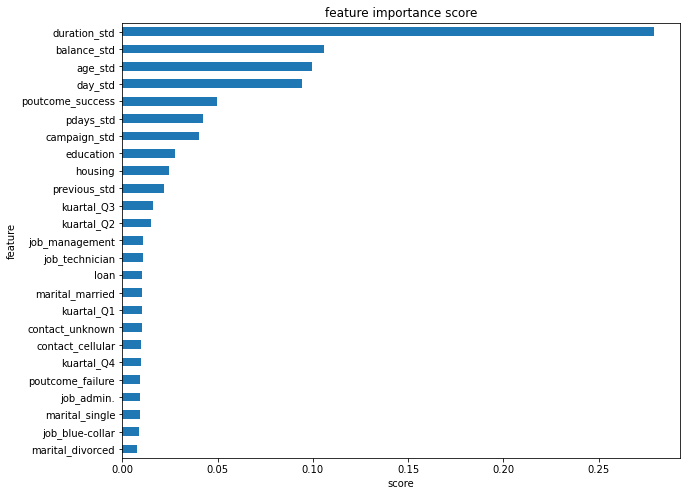

In [ ]:
show_feature_importance(rf_ori)

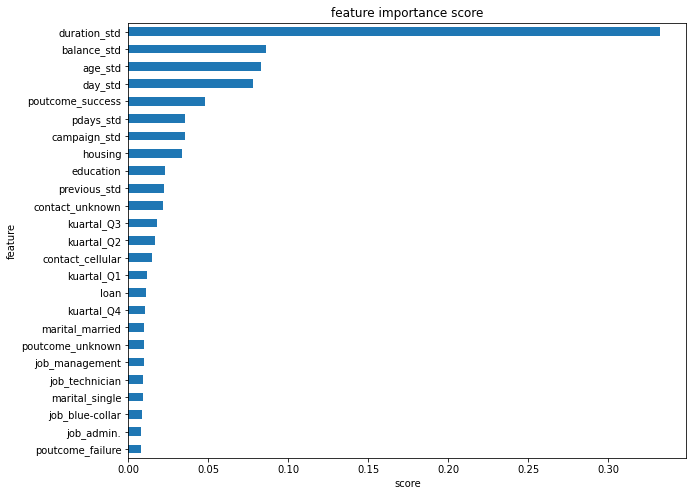

In [ ]:
show_feature_importance(rf_under)

# Modeling KNN

In [ ]:
# Fitting KNN
from sklearn.neighbors import KNeighborsClassifier

knn_0 = KNeighborsClassifier()
knn_ori = knn_0.fit(xtrain, ytrain)

knn_1 = KNeighborsClassifier()
knn_under = knn_1.fit(xtrain_under, ytrain_under)

knn_2 = KNeighborsClassifier()
knn_over = knn_2.fit(xtrain_over, ytrain_over)

knn_3 = KNeighborsClassifier()
knn_smote = knn_3.fit(xtrain_over_SMOTE, ytrain_over_SMOTE)

In [ ]:
# KNN Evaluation
print('Original')
ypred = knn_0.predict(xtest)
print(classification_report(ytest, ypred))
print('')

print('Under')
ypred = knn_1.predict(xtest_under)
print(classification_report(ytest_under, ypred))
print('')

print('Over')
ypred = knn_2.predict(xtest_over)
print(classification_report(ytest_over, ypred))
print('')

print('SMOTE')
ypred = knn_3.predict(xtest_over_SMOTE)
print(classification_report(ytest_over_SMOTE, ypred))

Original
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     13342
           1       0.58      0.35      0.44      1729

    accuracy                           0.90     15071
   macro avg       0.75      0.66      0.69     15071
weighted avg       0.88      0.90      0.88     15071


Under
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      3526
           1       0.75      0.68      0.72      1763

    accuracy                           0.82      5289
   macro avg       0.80      0.79      0.79      5289
weighted avg       0.82      0.82      0.82      5289


Over
              precision    recall  f1-score   support

           0       0.91      0.87      0.89     13291
           1       0.77      0.84      0.80      6670

    accuracy                           0.86     19961
   macro avg       0.84      0.85      0.85     19961
weighted avg       0.87      0.86      0.86     1996

# Modeling XGBoost

In [ ]:
# Fitting XGBoost
from xgboost import XGBClassifier

xg_0 = XGBClassifier()
xg_ori = xg_0.fit(xtrain, ytrain)

xg_1 = XGBClassifier()
xg_under = xg_1.fit(xtrain_under, ytrain_under)

xg_2 = XGBClassifier()
xg_over = xg_2.fit(xtrain_over, ytrain_over)

xg_3 = XGBClassifier()
xg_smote = xg_3.fit(xtrain_over_SMOTE, ytrain_over_SMOTE)

In [ ]:
# XGBoost Evaluation
print('Original')
ypred = xg_0.predict(xtest)
print(classification_report(ytest, ypred))
print('')

print('Under')
ypred = xg_1.predict(xtest_under)
print(classification_report(ytest_under, ypred))
print('')

print('Over')
ypred = xg_2.predict(xtest_over)
print(classification_report(ytest_over, ypred))
print('')

print('SMOTE')
ypred = xg_3.predict(xtest_over_SMOTE)
print(classification_report(ytest_over_SMOTE, ypred))

Original
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     13342
           1       0.65      0.38      0.48      1729

    accuracy                           0.91     15071
   macro avg       0.79      0.68      0.71     15071
weighted avg       0.89      0.91      0.89     15071


Under
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      3526
           1       0.78      0.76      0.77      1763

    accuracy                           0.85      5289
   macro avg       0.83      0.82      0.83      5289
weighted avg       0.85      0.85      0.85      5289


Over
              precision    recall  f1-score   support

           0       0.88      0.89      0.89     13291
           1       0.78      0.76      0.77      6670

    accuracy                           0.85     19961
   macro avg       0.83      0.83      0.83     19961
weighted avg       0.85      0.85      0.85     1996

# Model Selection

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

df_models = pd.DataFrame(columns=['model', 'run_time', 'auc', 'auc_cv'])

classifiers = {
    "LogisticRegression": LogisticRegression(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier()
}

for key in classifiers:

    print(key)

    start_time = time.time()

    classifier = classifiers[key]
    model = classifier.fit(xtrain, ytrain)
    y_pred_proba = model.predict_proba(xtest)

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, x, y, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')

    row = {'model': key,
           'run_time': format(round((time.time() - start_time)/60,2)),
           'auc': roc_auc_score(ytest, y_pred_proba[:, 1]),
           'auc_cv': scores.mean()
            }

    df_models = df_models.append(row, ignore_index=True)

LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


DecisionTreeClassifier
RandomForestClassifier
KNN


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


XGBClassifier


In [ ]:
df_models.sort_values(by='auc', ascending=False)

,model,run_time,auc,auc_cv
2,RandomForestClassifier,2.31,0.916729,0.976586
4,XGBClassifier,1.3,0.913049,0.955699
0,LogisticRegression,0.24,0.884914,0.942664
3,KNN,1.33,0.828343,0.952145
1,DecisionTreeClassifier,0.13,0.702108,0.856789


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

df_model1 = pd.DataFrame(columns=['model', 'run_time', 'precision', 'precision_cv'])

classifiers = {
    "LogisticRegression": LogisticRegression(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier()
}

for key in classifiers:

    print(key)

    start_time = time.time()

    classifier = classifiers[key]
    model = classifier.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, x, y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')

    row = {'model': key,
           'run_time': format(round((time.time() - start_time)/60,2)),
           'precision': precision_score(ytest, y_pred),
           'precision_cv': scores.mean()
            }

    df_model1 = df_model1.append(row, ignore_index=True)

LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


DecisionTreeClassifier
RandomForestClassifier
KNN


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


XGBClassifier


In [ ]:
df_model1.sort_values(by='precision', ascending=False)

,model,run_time,precision,precision_cv
4,XGBClassifier,1.34,0.652348,0.832518
0,LogisticRegression,0.33,0.648148,0.866925
2,RandomForestClassifier,1.86,0.634055,0.868952
3,KNN,1.24,0.577505,0.795442
1,DecisionTreeClassifier,0.17,0.448704,0.799752


# Hyperparameter Tuning

## Random Forest

In [ ]:
# example of grid searching key hyperparameters for RandomForestClassifier
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# define models and parameters
model = RandomForestClassifier()
hyperparams = dict(
                    n_estimators = [int(x) for x in np.linspace(10, 1000, num=100)],
                    criterion = ['gini', 'entropy'],
                    max_depth = [int(x) for x in np.linspace(1, 1000, num=50)],
                    min_samples_split = [int(x) for x in np.linspace(2, 40, num=40)],
                    min_samples_leaf = [int(x) for x in np.linspace(2, 20, num=20)],
                    max_features = ['auto', 'sqrt', 'log2']
                    )

# define grid search
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=50)
rs = RandomizedSearchCV(model, hyperparams, cv=cv, random_state=50, scoring='roc_auc')
rs_result = rs.fit(xtrain, ytrain)

# summarize results
print("Best: %f using %s" % (rs_result.best_score_, rs_result.best_params_))

means = rs_result.cv_results_['mean_test_score']
stds = rs_result.cv_results_['std_test_score']
params = rs_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.926812 using {'n_estimators': 870, 'min_samples_split': 29, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 347, 'criterion': 'entropy'}
0.923423 (0.006241) with: {'n_estimators': 890, 'min_samples_split': 7, 'min_samples_leaf': 13, 'max_features': 'auto', 'max_depth': 877, 'criterion': 'gini'}
0.926311 (0.006153) with: {'n_estimators': 970, 'min_samples_split': 17, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': 490, 'criterion': 'entropy'}
0.923198 (0.006219) with: {'n_estimators': 560, 'min_samples_split': 30, 'min_samples_leaf': 13, 'max_features': 'auto', 'max_depth': 551, 'criterion': 'gini'}
0.924832 (0.006135) with: {'n_estimators': 140, 'min_samples_split': 33, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 449, 'criterion': 'entropy'}
0.920906 (0.006481) with: {'n_estimators': 60, 'min_samples_split': 24, 'min_samples_leaf': 18, 'max_features': 'log2', 'max_depth': 959, 'criterion': 'entropy'}
0.924647 (0.006099) with: {'n_estimato

In [ ]:
# define models and parameters
model_0 = RandomForestClassifier(n_estimators = 870,
                    criterion = 'entropy',
                    max_depth = 347,
                    min_samples_split = 29,
                    min_samples_leaf = 2,
                    max_features = 'sqrt',
                    random_state = 50)
model_ori = model_0.fit(xtrain, ytrain)

model_1 = RandomForestClassifier(n_estimators = 870,
                    criterion = 'entropy',
                    max_depth = 347,
                    min_samples_split = 29,
                    min_samples_leaf = 2,
                    max_features = 'sqrt',
                    random_state = 50)
model_under = model_1.fit(xtrain_under, ytrain_under)

model_2 = RandomForestClassifier(n_estimators = 870,
                    criterion = 'entropy',
                    max_depth = 347,
                    min_samples_split = 29,
                    min_samples_leaf = 2,
                    max_features = 'sqrt',
                    random_state = 50)
model_over = model_2.fit(xtrain_over, ytrain_over)

model_3 = RandomForestClassifier(n_estimators = 870,
                    criterion = 'entropy',
                    max_depth = 347,
                    min_samples_split = 29,
                    min_samples_leaf = 2,
                    max_features = 'sqrt',
                    random_state = 50)
model_smote = model_3.fit(xtrain_over_SMOTE, ytrain_over_SMOTE)

In [ ]:
# Random Forest Evaluation
print('Original')
ypred = model_0.predict(xtest)
print(classification_report(ytest, ypred))
print('')

print('Under')
ypred = model_1.predict(xtest_under)
print(classification_report(ytest_under, ypred))
print('')

print('Over')
ypred = model_2.predict(xtest_over)
print(classification_report(ytest_over, ypred))
print('')

print('SMOTE')
ypred = model_3.predict(xtest_over_SMOTE)
print(classification_report(ytest_over_SMOTE, ypred))

Original
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     13342
           1       0.68      0.33      0.45      1729

    accuracy                           0.91     15071
   macro avg       0.80      0.66      0.70     15071
weighted avg       0.89      0.91      0.89     15071


Under
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      3526
           1       0.78      0.79      0.79      1763

    accuracy                           0.86      5289
   macro avg       0.84      0.84      0.84      5289
weighted avg       0.86      0.86      0.86      5289


Over
              precision    recall  f1-score   support

           0       0.94      0.91      0.93     13291
           1       0.84      0.88      0.86      6670

    accuracy                           0.90     19961
   macro avg       0.89      0.90      0.89     19961
weighted avg       0.90      0.90      0.90     1996

In [ ]:
print('Original')
eval_classification(model, xtrain, ytrain, xtest, ytest)

Original
Accuracy (Train Set): 0.91
Accuracy (Test Set): 0.91

Precision (Train Set): 0.69
Precision (Test Set): 0.65

Recall (Train Set): 0.40
Recall (Test Set): 0.38

F1-Score (Train Set): 0.50
F1-Score (Test Set): 0.48

AUC (Train Set): 0.93
AUC (Test Set): 0.91


In [ ]:
print('Under Sampling')
eval_classification(model_under, xtrain_under, ytrain_under, xtest_under, ytest_under)

Under Sampling
Accuracy (Train Set): 0.90
Accuracy (Test Set): 0.86

Precision (Train Set): 0.85
Precision (Test Set): 0.78

Recall (Train Set): 0.85
Recall (Test Set): 0.79

F1-Score (Train Set): 0.85
F1-Score (Test Set): 0.79

AUC (Train Set): 0.97
AUC (Test Set): 0.92


In [ ]:
print('Over Sampling')
eval_classification(model_over, xtrain_over, ytrain_over, xtest_over, ytest_over)

Over Sampling
Accuracy (Train Set): 0.93
Accuracy (Test Set): 0.90

Precision (Train Set): 0.88
Precision (Test Set): 0.84

Recall (Train Set): 0.93
Recall (Test Set): 0.88

F1-Score (Train Set): 0.90
F1-Score (Test Set): 0.86

AUC (Train Set): 0.99
AUC (Test Set): 0.96


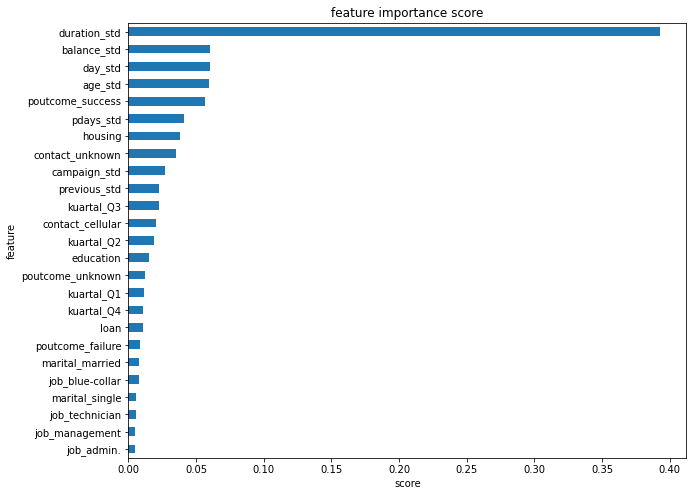

In [ ]:
show_feature_importance(model_over)

In [ ]:
print('SMOTE')
eval_classification(model_smote, xtrain_over_SMOTE, ytrain_over_SMOTE, xtest_over_SMOTE, ytest_over_SMOTE)

SMOTE
Accuracy (Train Set): 0.94
Accuracy (Test Set): 0.91

Precision (Train Set): 0.90
Precision (Test Set): 0.85

Recall (Train Set): 0.92
Recall (Test Set): 0.87

F1-Score (Train Set): 0.91
F1-Score (Test Set): 0.86

AUC (Train Set): 0.99
AUC (Test Set): 0.97
